# **Sobre o notebook**

Este notebook será utilizado para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura.

Utilizando os conhecimentos adquiridos, iremos realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, vamos analisar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.



## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Entendendo os dados**

#### **Importando os pacotes e configurando o ambiente**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importando o dataset e armazenando o seu conteúdo em um DataFrame**

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Visualizando o conteúdo do DataFrame e lendo as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilizaremos as funções `info`.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [ ]:
dados.shape

(76840, 7)

#### **Explorando brevemente a variável `UF` e investigando quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilizaremos as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [ ]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
regiao = dados['UF'].value_counts().reset_index()
regiao.columns = ['UF', 'Count']
regiao

,UF,Count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


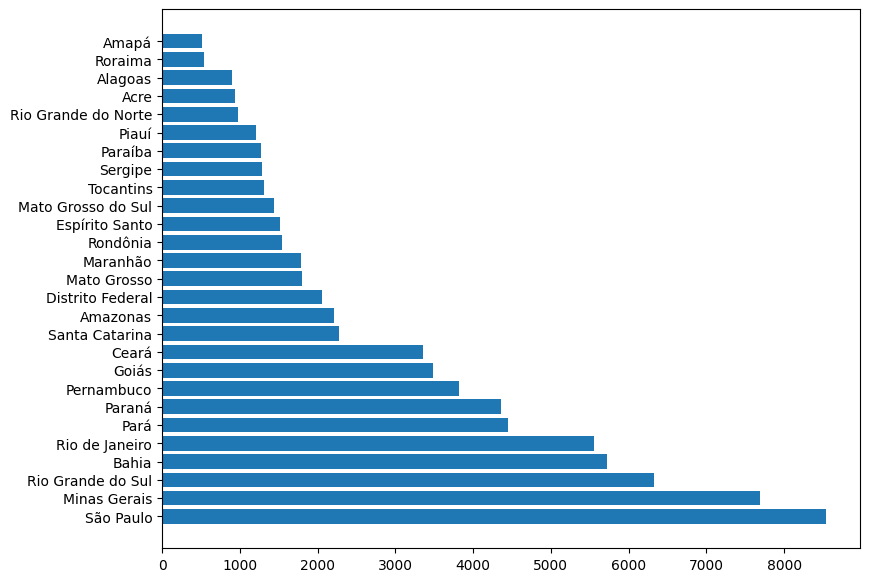

In [ ]:
plt.figure(figsize=(9, 7))
plt.barh(regiao['UF'], regiao['Count'])
plt.show()

#### **Transformando as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical.**

In [ ]:
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [ ]:
dados['sexo_indicador'] = pd.Categorical(dados['Sexo'],
      categories=[0, 1],
      ordered=True
)

In [ ]:
dados['sexo categoria'] = dados['sexo_indicador'].map(sexo)

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_indicador,sexo categoria
0,Rondônia,0,23,8,12,800,1.60,0,Masculino
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino
2,Rondônia,1,35,8,15,880,1.76,1,Feminino
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino
4,Rondônia,1,47,8,9,150,1.69,1,Feminino


In [ ]:
dados_unico = dados[['Sexo', 'sexo_indicador']].drop_duplicates()
dados_unico

,Sexo,sexo_indicador
0,0,0
1,1,1


In [ ]:
dados = dados.drop('Sexo', axis=1)
dados.head()

,UF,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_indicador,sexo categoria
0,Rondônia,23,8,12,800,1.60,0,Masculino
1,Rondônia,23,2,12,1150,1.74,1,Feminino
2,Rondônia,35,8,15,880,1.76,1,Feminino
3,Rondônia,46,2,6,3500,1.78,0,Masculino
4,Rondônia,47,8,9,150,1.69,1,Feminino


##### Cor

In [ ]:
sorted(dados['Cor'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [ ]:
dados['cor_indicador'] = pd.Categorical(dados['Cor'],
      categories=[0, 2, 4, 6, 8],
      ordered=True
)

In [ ]:
dados['cor categoria'] = dados['cor_indicador'].map(cor)
dados.head()

,UF,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_indicador,sexo categoria,cor_indicador,cor categoria
0,Rondônia,23,8,12,800,1.60,0,Masculino,8,Parda
1,Rondônia,23,2,12,1150,1.74,1,Feminino,2,Branca
2,Rondônia,35,8,15,880,1.76,1,Feminino,8,Parda
3,Rondônia,46,2,6,3500,1.78,0,Masculino,2,Branca
4,Rondônia,47,8,9,150,1.69,1,Feminino,8,Parda


In [ ]:
dados_unico_cor = dados[['Cor', 'cor_indicador']].drop_duplicates()
dados_unico_cor

,Cor,cor_indicador
0,8,8
1,2,2
8,4,4
35,6,6
659,0,0


In [ ]:
dados = dados.drop('Cor', axis=1)
dados.head()

,UF,Idade,Anos.de.Estudo,Renda,Altura,sexo_indicador,sexo categoria,cor_indicador,cor categoria
0,Rondônia,23,12,800,1.60,0,Masculino,8,Parda
1,Rondônia,23,12,1150,1.74,1,Feminino,2,Branca
2,Rondônia,35,15,880,1.76,1,Feminino,8,Parda
3,Rondônia,46,6,3500,1.78,0,Masculino,2,Branca
4,Rondônia,47,9,150,1.69,1,Feminino,8,Parda


##### Anos de Estudo

In [ ]:
sorted(dados['Anos.de.Estudo'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

In [ ]:
dados['Anos_de_Estudo'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    ordered=True
  )

In [ ]:
dados['Anos de Estudo'] = dados['Anos_de_Estudo'].map(anos_de_estudo)
dados.head()

,UF,Idade,Anos.de.Estudo,Renda,Altura,sexo_indicador,sexo categoria,cor_indicador,cor categoria,Anos_de_Estudo,Anos de Estudo
0,Rondônia,23,12,800,1.60,0,Masculino,8,Parda,12,11 anos
1,Rondônia,23,12,1150,1.74,1,Feminino,2,Branca,12,11 anos
2,Rondônia,35,15,880,1.76,1,Feminino,8,Parda,15,14 anos
3,Rondônia,46,6,3500,1.78,0,Masculino,2,Branca,6,5 anos
4,Rondônia,47,9,150,1.69,1,Feminino,8,Parda,9,8 anos


In [ ]:
dados_unico_estudo = dados[['Anos.de.Estudo', 'Anos_de_Estudo']].drop_duplicates()
dados_unico_estudo

,Anos.de.Estudo,Anos_de_Estudo
0,12,12
2,15,15
3,6,6
4,9,9
8,14,14
15,16,16
16,10,10
20,1,1
22,5,5
36,7,7


In [ ]:
dados = dados.drop('Anos.de.Estudo', axis=1)
dados.head()

,UF,Idade,Renda,Altura,sexo_indicador,sexo categoria,cor_indicador,cor categoria,Anos_de_Estudo,Anos de Estudo
0,Rondônia,23,800,1.60,0,Masculino,8,Parda,12,11 anos
1,Rondônia,23,1150,1.74,1,Feminino,2,Branca,12,11 anos
2,Rondônia,35,880,1.76,1,Feminino,8,Parda,15,14 anos
3,Rondônia,46,3500,1.78,0,Masculino,2,Branca,6,5 anos
4,Rondônia,47,150,1.69,1,Feminino,8,Parda,9,8 anos


#### **Apresentando em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [ ]:
print(f"A menor renda é de R$ {dados['Renda'].min():,.2f}")
print(f"A maior renda é de R$ {dados['Renda'].max():,.2f}")

A menor renda é de R$ 0.00
A maior renda é de R$ 200,000.00


## **Identificando o perfil do público**

### **Analisando o perfil das pessoas responsáveis**

Agora vamos identificar o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Respondendo as perguntas abaixo e refletindo sobre os achados.






#### **Construindo uma tabela de frequências das pessoas responsáveis pelo domicílio por `sexo categoria`. Adicionando também uma coluna com esse valor em porcentagem.**

In [ ]:
freq_cat_sexo = (dados.groupby('sexo categoria', observed=False)
                   .size()
                   .reset_index(name='freq_absoluta')
                   .sort_values(by='sexo categoria', ascending=False))

freq_cat_sexo

,sexo categoria,freq_absoluta
1,Feminino,23590
0,Masculino,53250


In [ ]:
freq_cat_sexo['freq_relativa'] = round((freq_cat_sexo['freq_absoluta'] / freq_cat_sexo['freq_absoluta'].sum()) * 100, 1)

In [ ]:
freq_cat_sexo

,sexo categoria,freq_absoluta,freq_relativa
1,Feminino,23590,30.7
0,Masculino,53250,69.3


#### **Construindo uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `sexo categoria` e `cor categoria` das pessoas responsáveis pelo domicílio.**

In [ ]:
tab_responsaveis_regiao = pd.crosstab(dados['sexo categoria'], dados['cor categoria'])

In [ ]:
tab_responsaveis_regiao

cor categoria,Indígena,Branca,Preta,Amarela,Parda
sexo categoria,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
tab_responsaveis_regiao_relativa = pd.crosstab(dados['sexo categoria'], dados['cor categoria'], normalize = 'columns') * 100

tab_responsaveis_regiao_relativa = round(tab_responsaveis_regiao_relativa, 1)

tab_responsaveis_regiao_relativa

cor categoria,Indígena,Branca,Preta,Amarela,Parda
sexo categoria,,,,,
Masculino,71.7,69.8,65.6,66.8,69.8
Feminino,28.3,30.2,34.4,33.2,30.2


> #### Conclusões

Podemos notar depois das análises que as pessoas do sexo masculino são a maioria como responsáveis pelos domicílios com mais de 60% do contigente e que pessoas de cor branca e parda estão em maioria também.

#### **Construindo uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `sexo categoria` e `cor categoria`.**

In [ ]:
renda_media = round(pd.crosstab(dados['sexo categoria'], dados['cor categoria'], values=dados['Renda'], aggfunc='mean'), 2)

renda_media

cor categoria,Indígena,Branca,Preta,Amarela,Parda
sexo categoria,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Após análises podemos observar que no caso de pessoas do sexo masculino, pessoas de cor Branca e Amarela possuem a maior renda média, e no caso do sexo feminino, pessoas Indígenas e de cor Amarela possuem a maior renda média.

## **Analisando a tendência dos dados**

### **Analisando a renda das pessoas responsáveis**

Nesta etapa vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Respondendo as perguntas abaixo e refletindo sobre os achados.

#### **Calculando as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [ ]:
renda_media = round(dados['Renda'].mean(), 2)
renda_media

np.float64(2000.38)

In [ ]:
renda_mediana = round(dados['Renda'].median(), 2)
renda_mediana

1200.0

In [ ]:
renda_moda = dados['Renda'].mode()
renda_moda

,Renda
0,788


#### **Criando um gráfico de barras do Top 5 estados pela médias de `Renda`**

In [ ]:
top_5 = dados.groupby('UF')['Renda'].mean().reset_index().sort_values(by='Renda', ascending=False).head(5).round(2)
top_5

,UF,Renda
6,Distrito Federal,4241.95
25,São Paulo,2638.10
20,Rio de Janeiro,2496.40
13,Paraná,2493.87
23,Santa Catarina,2470.85


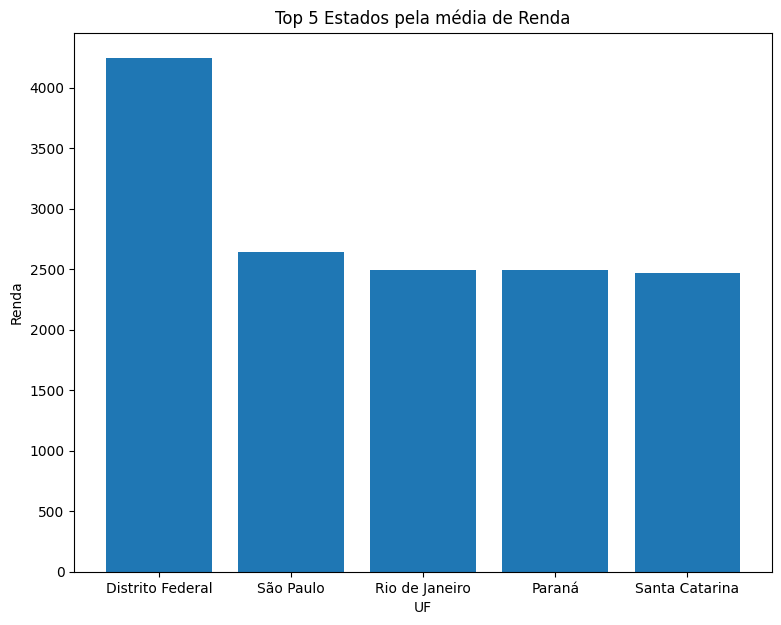

In [ ]:
plt.figure(figsize=(9, 7))
plt.bar(top_5['UF'], top_5['Renda'])

plt.xlabel('UF')
plt.ylabel('Renda')
plt.title('Top 5 Estados pela média de Renda')

plt.show()

> #### Conclusões

Após a análise podemos notar que o Distrito Federal possui a maior média de renda, seguido por São Paulo e Rio de Janeiro.

#### **Construindo 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado (`UF`) e por `sexo categoria`**

In [ ]:
tab_dados = pd.crosstab(dados['UF'], dados['sexo categoria'])
tab_dados

sexo categoria,Masculino,Feminino
UF,,
Acre,698,239
Alagoas,675,228
Amapá,330,182
Amazonas,1518,688
Bahia,3806,1911
Ceará,2227,1132
Distrito Federal,1253,801
Espírito Santo,1098,413
Goiás,2580,898


##### **Média**

In [ ]:
tab_dados_media = pd.crosstab(dados['UF'], dados['sexo categoria'], values=dados['Renda'], aggfunc='mean').round(2)
tab_dados_media

sexo categoria,Masculino,Feminino
UF,,
Acre,1635.34,1128.62
Alagoas,1157.75,1105.47
Amapá,1930.40,1736.16
Amazonas,1539.99,1235.83
Bahia,1557.50,1175.02
Ceará,1341.62,1085.80
Distrito Federal,4863.37,3269.88
Espírito Santo,2129.32,1752.71
Goiás,2222.63,1339.38


##### **Mediana**

In [ ]:
tab_dados_mediana = pd.crosstab(dados['UF'], dados['sexo categoria'], values=dados['Renda'], aggfunc='median').round(2)
tab_dados_mediana

sexo categoria,Masculino,Feminino
UF,,
Acre,1000.0,788.0
Alagoas,788.0,788.0
Amapá,1337.5,920.0
Amazonas,1000.0,800.0
Bahia,900.0,788.0
Ceará,800.0,788.0
Distrito Federal,2500.0,1500.0
Espírito Santo,1500.0,927.0
Goiás,1500.0,900.0


##### **Renda Máxima**

In [ ]:
tab_dados_renda_max = pd.crosstab(dados['UF'], dados['sexo categoria'], values=dados['Renda'], aggfunc='max').round(2)
tab_dados_renda_max

sexo categoria,Masculino,Feminino
UF,,
Acre,30000,15000
Alagoas,10000,11000
Amapá,15000,15580
Amazonas,22000,15000
Bahia,200000,30000
Ceará,25000,24000
Distrito Federal,100000,30000
Espírito Santo,40000,100000
Goiás,30000,26000


> #### Conclusões

Os dados revelam uma clara disparidade de renda entre homens e mulheres em todas as UFs, com algumas regiões apresentando níveis de renda mais elevados e uma maior concentração de rendimentos no topo.

#### **Construindo 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

In [ ]:
tab_dados_altura = dados['Altura']
tab_dados_altura.head()

,Altura
0,1.60
1,1.74
2,1.76
3,1.78
4,1.69


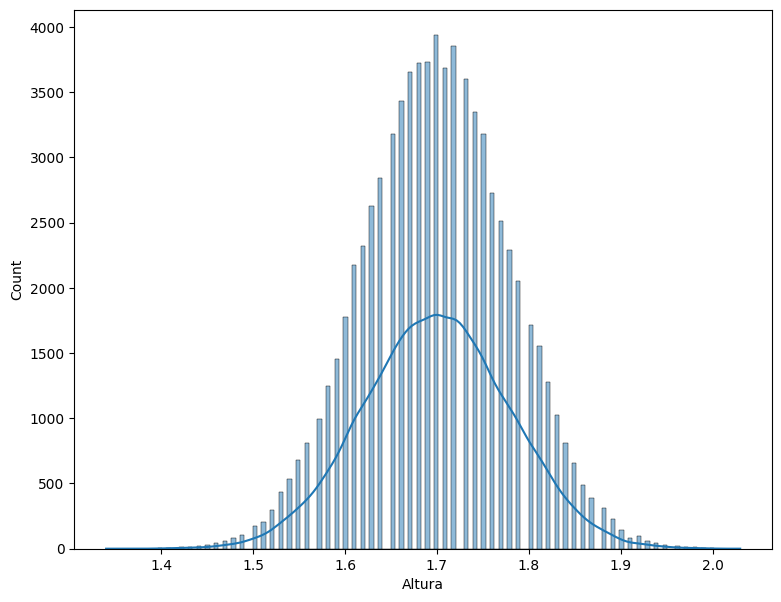

In [ ]:
plt.figure(figsize=(9, 7))
sns.histplot(tab_dados_altura, kde=True)
plt.show()

> #### Conclusões

O histograma da Altura parece apresentar uma distribuição aproximadamente simétrica, com a maioria dos dados concentrados em torno de um valor central. A curva de densidade se assemelha a uma distribuição normal (formato de sino).

##### **Idade**

In [ ]:
tab_dados_idade = dados['Idade']
tab_dados_idade.head()

,Idade
0,23
1,23
2,35
3,46
4,47


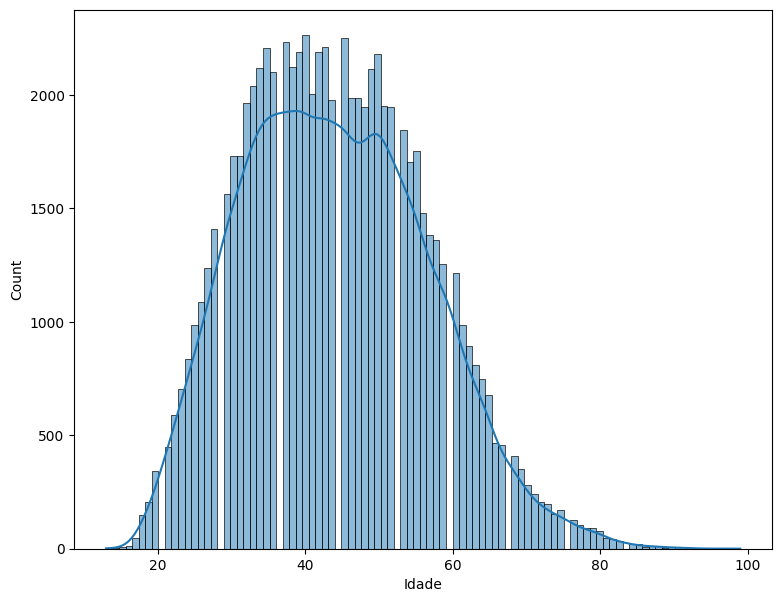

In [ ]:
plt.figure(figsize=(9, 7))
sns.histplot(tab_dados_idade, kde=True)
plt.show()

> #### Conclusões

O histograma da Idade mostra uma distribuição que parece ser ligeiramente assimétrica à direita (cauda mais longa para a direita). Isso sugere que há uma concentração maior de pessoas em idades mais jovens, com uma menor quantidade de pessoas em idades mais avançadas.

## **Investigando os dados dos colaboradores**

### **Analisando as rendas e suas divisões**

Nesta etapa vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responder as perguntas abaixo e refletir sobre os achados.


#### **Calculando o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [ ]:
import math

In [ ]:
dados_renda_ate_15k = dados[dados['Renda'] <= 15000].copy()

In [ ]:
n = len(dados_renda_ate_15k)

In [ ]:
k = 1 + (10/3) * math.log10(n)

In [ ]:
k = int(round(k))

In [ ]:
print(f"O número de classes para a Renda até R$15.000 utilizando a regra de Sturges é: {k}")

O número de classes para a Renda até R$15.000 utilizando a regra de Sturges é: 17


#### **Criando o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



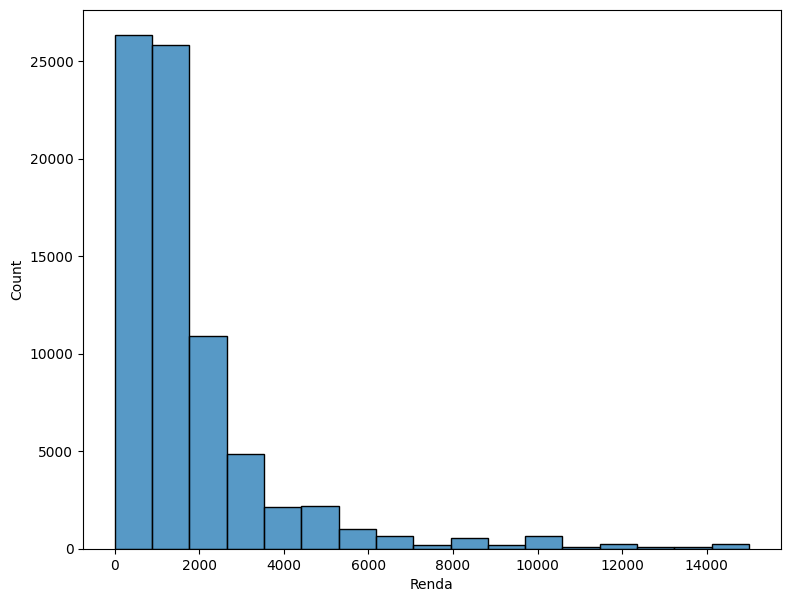

In [ ]:
plt.figure(figsize=(9, 7))
sns.histplot(dados_renda_ate_15k['Renda'], bins=k)
plt.show()

> #### Conclusões

O histograma reforça a ideia de que a maior parte das pessoas responsáveis na pesquisa possui rendimentos mais baixos, com uma parcela menor recebendo rendas mais elevadas, mesmo dentro do limite de R$ 15.000. A distribuição assimétrica é um ponto chave a ser considerado ao analisar a renda nesta população.

#### **Agora vamos responder as seguintes questões sobre o nosso dataset completo utilizando os conceitos abordados até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [ ]:
percentual_salario_minimo = round((len(dados[dados['Renda'] <= 788]) / len(dados)) * 100, 2)
print(f"{percentual_salario_minimo}% das pessoas responsáveis ganham até um salário mínimo em 2015.")

28.87% das pessoas responsáveis ganham até um salário mínimo em 2015.


##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [ ]:
renda_95 = round(dados['Renda'].quantile(0.95), 2)
print(f"A renda máxima de 95% das pessoas responsáveis na pesquisa é de R$ {renda_95}.")

A renda máxima de 95% das pessoas responsáveis na pesquisa é de R$ 6000.0.


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [ ]:
dados_sem_zero = dados[dados['Renda'] > 0]

percentil_99 = dados_sem_zero['Renda'].quantile(0.99)

renda_minima_top_1_percent = dados_sem_zero[dados_sem_zero['Renda'] >= percentil_99]['Renda'].min()

print(f"A renda mínima dos 1% mais bem pagos da pesquisa (excluindo rendas zero) é de R$ {renda_minima_top_1_percent:,.2f}.")

A renda mínima dos 1% mais bem pagos da pesquisa (excluindo rendas zero) é de R$ 15,000.00.


##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [ ]:
renda_maxima = {
    '25': dados[dados['Renda'] <= 6000]['Renda'].quantile(0.25),
    '50': dados[dados['Renda'] <= 6000]['Renda'].quantile(0.50),
    '75': dados[dados['Renda'] <= 6000]['Renda'].quantile(0.75)
}

renda_maxima

{'25': np.float64(788.0), '50': np.float64(1200.0), '75': np.float64(2000.0)}

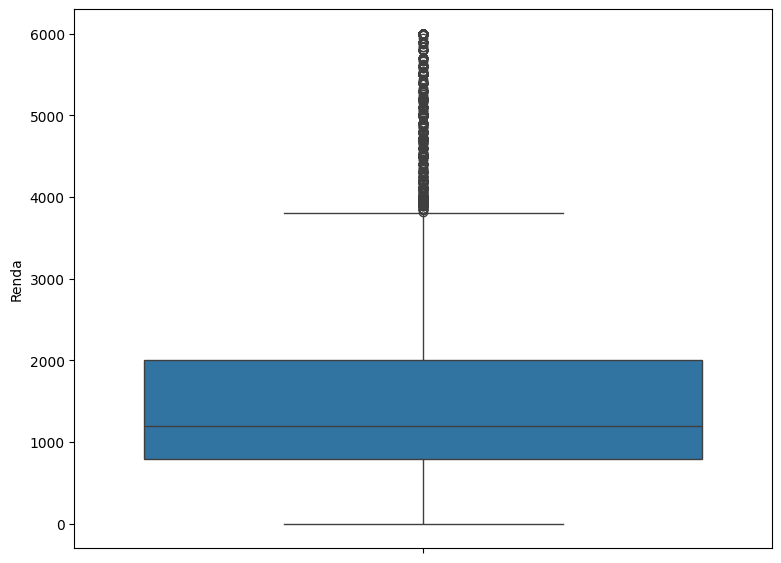

In [ ]:
plt.figure(figsize=(9, 7))
sns.boxplot(dados[dados['Renda'] <= 6000]['Renda'])
plt.show()

> #### Conclusões

O fato de aproximadamente 28.87% das pessoas responsáveis ganharem até um salário mínimo (788,00) em 2015 indica uma parcela significativa da população com rendimentos muito baixos. A renda máxima de 95% das pessoas responsáveis ser de R$ 6.000,00 mostra que a vasta maioria da população na pesquisa tem rendimentos abaixo desse valor. Isso, novamente, sublinha a concentração de renda nas faixas mais baixas e médias. A renda mínima dos 1% mais bem pagos ser de 15.000,00 (excluindo rendas zero) demonstra a grande disparidade de renda. Uma pequena porcentagem da população detém rendimentos significativamente mais altos do que a maioria.

#### **Construindo o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `sexo categoria` e `cor categoria`.**

In [ ]:
renda_95_percentil = dados['Renda'].quantile(0.95)
dados_renda_ate_95 = dados[dados['Renda'] <= renda_95_percentil].copy()

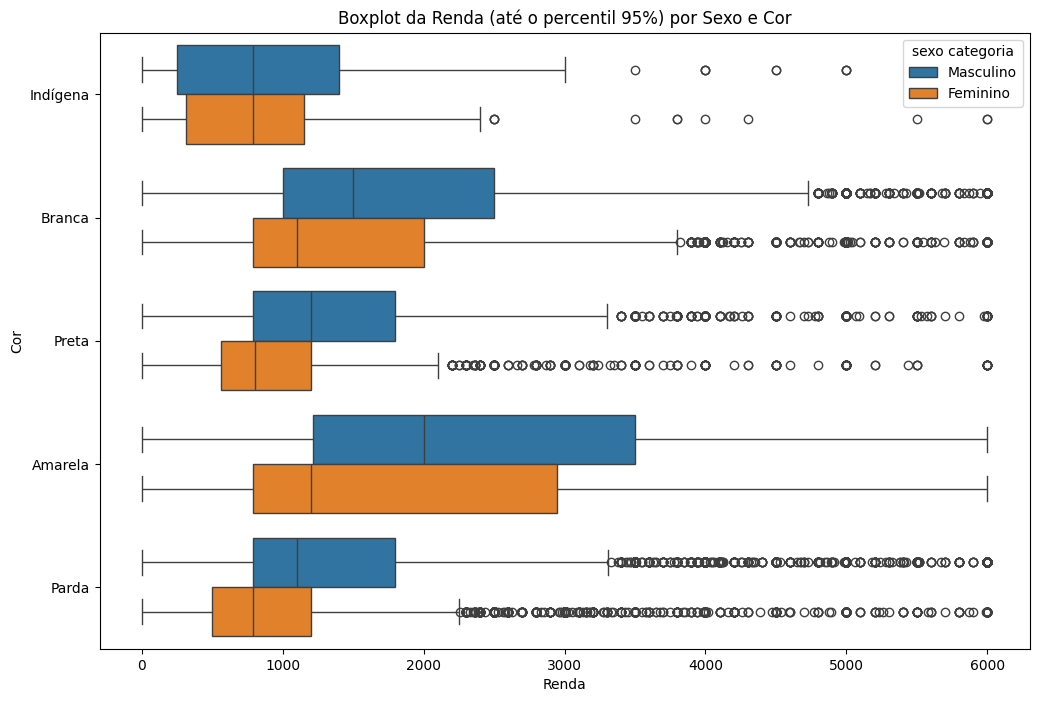

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Renda', y='cor categoria', hue='sexo categoria', data=dados_renda_ate_95)
plt.title('Boxplot da Renda (até o percentil 95%) por Sexo e Cor')
plt.xlabel('Renda')
plt.ylabel('Cor')
plt.show()

#### **Qual a idade limite para 20% da população? Vamos construir o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

In [ ]:
idade_limite_20_percentil = dados['Idade'].quantile(0.20)
print(f"A idade limite para 20% da população é de aproximadamente {idade_limite_20_percentil:.0f} anos.")

A idade limite para 20% da população é de aproximadamente 33 anos.


In [ ]:
pessoas_ate_idade_limite = dados[dados['Idade'] <= idade_limite_20_percentil]

In [ ]:
numero_pessoas_ate_idade_limite = len(pessoas_ate_idade_limite)

In [ ]:
print(f"O número de pessoas com idade até {idade_limite_20_percentil:.0f} anos é de {numero_pessoas_ate_idade_limite}.")

O número de pessoas com idade até 33 anos é de 17092.


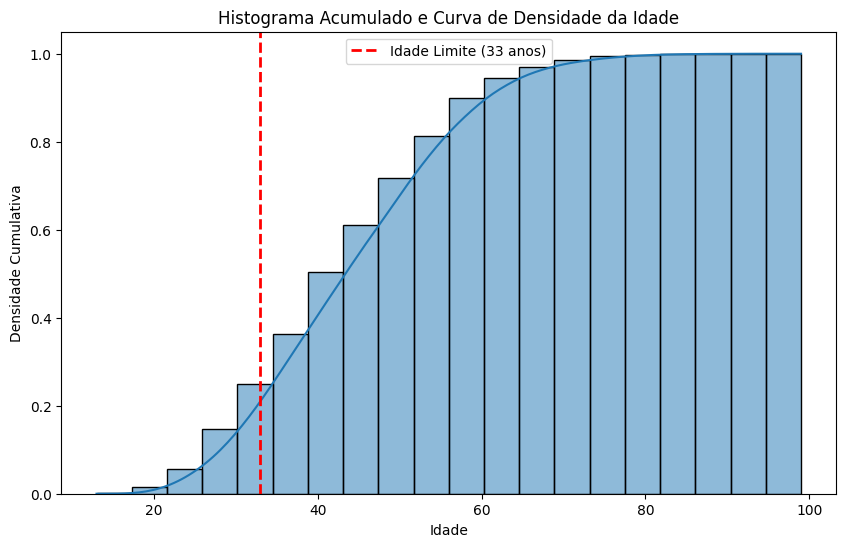

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['Idade'], kde=True, bins=20, cumulative=True, stat="proportion")
plt.axvline(idade_limite_20_percentil, color='red', linestyle='dashed', linewidth=2, label=f'Idade Limite ({idade_limite_20_percentil:.0f} anos)')
plt.title('Histograma Acumulado e Curva de Densidade da Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade Cumulativa')
plt.legend()
plt.show()

> #### Conclusões

O boxplot ilustra visualmente a disparidade de renda entre homens e mulheres dentro de cada categoria de cor. Também podemos observar diferenças nas distribuições de renda entre as categorias de cor. Pessoas de cor Branca e Amarela tendem a apresentar medianas e quartis de renda mais altos em comparação com pessoas de cor Indígena, Preta e Parda. A análise mostrou que 20% da população responsável tem até aproximadamente 33 anos de idade. Isso indica que uma parcela significativa da amostra é composta por indivíduos mais jovens.

## **Analisando a variação dos dados**

### **Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responder as perguntas abaixo e refletir sobre os achados.


#### **Vamos responder as seguintes questões sobre o nosso dataset utilizando os conceitos que abordamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [ ]:
desvio_medio_absoluto_renda = round((dados['Renda'] - dados['Renda'].mean()).abs().mean(), 2)
print(f"O desvio médio absoluto da renda das pessoas responsáveis é: {desvio_medio_absoluto_renda}")

O desvio médio absoluto da renda das pessoas responsáveis é: 1526.5


In [ ]:
variancia_renda = round(dados['Renda'].var(), 2)
print(f"A variância da renda das pessoas responsáveis é: {variancia_renda}")

A variância da renda das pessoas responsáveis é: 11044906.01


In [ ]:
desvio_padrao_renda = round(dados['Renda'].std(), 2)
print(f"O desvio padrão da renda das pessoas responsáveis é: {desvio_padrao_renda}")

O desvio padrão da renda das pessoas responsáveis é: 3323.39


##### **2. Construindo uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [ ]:
renda_por_anos_estudo = dados.groupby('Anos de Estudo', observed=False)['Renda'].agg(['mean', 'median', 'std']).round(2)
renda_por_anos_estudo.head(17)

,mean,median,std
Anos de Estudo,,,
Sem instrução e menos de 1 ano,732.99,600.0,955.27
1 ano,806.52,700.0,1203.87
2 anos,842.56,788.0,1298.87
3 anos,980.04,788.0,1907.14
4 anos,1150.44,900.0,1293.14
5 anos,1183.58,940.0,1328.71
6 anos,1284.08,1000.0,1326.14
7 anos,1289.17,1000.0,1279.41
8 anos,1437.74,1100.0,1404.28


> #### Conclusões

A tabela de renda por anos de estudo mostra uma relação positiva entre o nível de educação e a renda. Em geral, quanto maior o número de anos de estudo, maior a renda média e mediana.

##### **3.   Construindo uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [ ]:
renda_sexo_biologico = dados[dados['Renda'] <= 15000].groupby('sexo categoria', observed=False)['Renda'].agg(['mean', 'median', 'std']).round(2)
renda_sexo_biologico

,mean,median,std
sexo categoria,,,
Masculino,1964.35,1300.0,2101.16
Feminino,1460.14,900.0,1763.69


> #### Conclusões

Em resumo, esta tabela específica reforça a conclusão geral de que existe uma desigualdade de renda significativa entre homens e mulheres na população estudada, com homens apresentando rendas mais altas e uma maior variabilidade em seus rendimentos em comparação com as mulheres, mesmo considerando apenas rendas até R$ 15.000.



#### **Construindo um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `sexo categoria`. Para interpretar o resultado vamos construir 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [ ]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
regiao_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Mato Grosso do Sul', 'Mato Grosso', 'Distrito Federal'])]

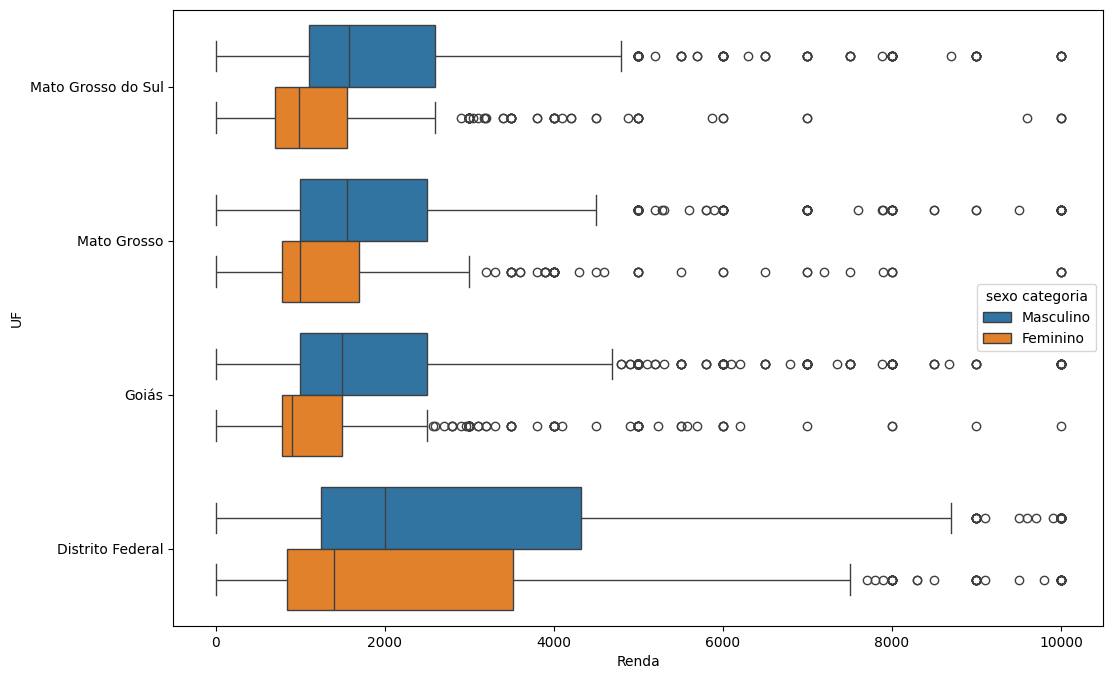

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Renda', y='UF', hue='sexo categoria', data=regiao_centro_oeste[regiao_centro_oeste['Renda'] <= 10000])
plt.show()

##### **Média**

In [ ]:
regiao_centro_oeste_media_renda = round(regiao_centro_oeste.groupby('UF')['Renda'].mean(), 2)
regiao_centro_oeste_media_renda

,Renda
UF,
Distrito Federal,4241.95
Goiás,1994.58
Mato Grosso,2130.65
Mato Grosso do Sul,2262.60


In [ ]:
media_renda_centro_oeste_estado_sexo = regiao_centro_oeste.groupby(['UF', 'sexo categoria'], observed=False)['Renda'].mean().round(2)
display(media_renda_centro_oeste_estado_sexo)

UF                  sexo categoria
Distrito Federal    Masculino         4863.37
                    Feminino          3269.88
Goiás               Masculino         2222.63
                    Feminino          1339.38
Mato Grosso         Masculino         2335.35
                    Feminino          1604.29
Mato Grosso do Sul  Masculino         2603.48
                    Feminino          1519.89
Name: Renda, dtype: float64

##### **Mediana**

In [ ]:
regiao_centro_oeste_mediana = round(regiao_centro_oeste.groupby('UF')['Renda'].median(), 2)
regiao_centro_oeste_mediana

,Renda
UF,
Distrito Federal,2000.0
Goiás,1500.0
Mato Grosso,1500.0
Mato Grosso do Sul,1500.0


In [ ]:
mediana_renda_centro_oeste_estado_sexo = regiao_centro_oeste.groupby(['UF', 'sexo categoria'], observed=False)['Renda'].median().round(2)
display(mediana_renda_centro_oeste_estado_sexo)

UF                  sexo categoria
Distrito Federal    Masculino         2500.0
                    Feminino          1500.0
Goiás               Masculino         1500.0
                    Feminino           900.0
Mato Grosso         Masculino         1576.0
                    Feminino          1000.0
Mato Grosso do Sul  Masculino         1600.0
                    Feminino           988.0
Name: Renda, dtype: float64

##### **Desvio Padrão**

In [ ]:
regiao_centro_oeste_desvio_padrao = round(regiao_centro_oeste.groupby('UF')['Renda'].std(), 2)
regiao_centro_oeste_desvio_padrao

,Renda
UF,
Distrito Federal,5550.46
Goiás,2221.93
Mato Grosso,2542.63
Mato Grosso do Sul,3031.42


In [ ]:
desvio_padrao_renda_centro_oeste_estado_sexo = regiao_centro_oeste.groupby(['UF', 'sexo categoria'], observed=False)['Renda'].std().round(2)
display(desvio_padrao_renda_centro_oeste_estado_sexo)

UF                  sexo categoria
Distrito Federal    Masculino         6243.91
                    Feminino          4061.46
Goiás               Masculino         2382.05
                    Feminino          1497.90
Mato Grosso         Masculino         2760.47
                    Feminino          1765.82
Mato Grosso do Sul  Masculino         3324.35
                    Feminino          2083.73
Name: Renda, dtype: float64

> #### Conclusões

Em resumo, a análise do boxplot e das estatísticas descritivas para a Região Centro-Oeste reforça a presença da desigualdade de renda por sexo e destaca as diferenças de níveis de renda e variabilidade entre os estados da região, com o Distrito Federal se sobressaindo em termos de renda e dispersão.

# Relatório de Análise Descritiva - PNAD 2015

Este relatório resume as principais análises e conclusões obtidas a partir da exploração do conjunto de dados adaptado da Pesquisa Nacional por Amostra de Domicílios (PNAD) de 2015, focando na análise descritiva das características das pessoas responsáveis pelos domicílios no Brasil.

## Assuntos Abordados

O notebook percorreu as seguintes etapas de análise:

1.  **Entendimento dos Dados:** Carregamento e visualização inicial do dataset, identificação dos tipos de dados e dimensões.
2.  **Exploração da Variável UF:** Análise da distribuição dos dados por Unidade Federativa, identificando o número de registros por estado.
3.  **Transformação de Variáveis:** Conversão das variáveis categóricas codificadas (`Sexo`, `Cor`, `Anos.de.Estudo`) para formatos mais legíveis (`sexo categoria`, `cor categoria`, `Anos de Estudo`) e remoção das colunas originais.
4.  **Análise do Perfil do Público:**
    *   Construção de tabelas de frequência para `sexo categoria` e tabelas cruzadas para `sexo categoria` vs `cor categoria` para entender a composição da amostra.
    *   Cálculo da renda média cruzando `sexo categoria` e `cor categoria`.
5.  **Análise da Tendência dos Dados (Renda e Outras Variáveis):**
    *   Cálculo das medidas de tendência central (`Renda`): média, mediana e moda.
    *   Identificação e visualização do Top 5 estados pela média de `Renda`.
    *   Construção de tabelas cruzadas para média, mediana e valores máximos de `Renda` por `UF` e `sexo categoria`.
    *   Construção de histogramas com curva de densidade para `Altura` e `Idade`.
6.  **Investigação dos Dados por Medidas Separatrizes:**
    *   Cálculo do número de classes para `Renda` até R$ 15.000 utilizando a regra de Sturges.
    *   Criação do histograma da `Renda` até R$ 15.000.
    *   Cálculo de percentuais de pessoas com renda até 1 salário mínimo.
    *   Cálculo da renda máxima para 95% da população e renda mínima para os 1% mais bem pagos.
    *   Cálculo dos quartis para a `Renda` até R$ 6.000 e construção do boxplot correspondente.
    *   Construção do boxplot da `Renda` (até o percentil 95%) por `sexo categoria` e `cor categoria`.
    *   Identificação da idade limite para 20% da população e visualização no histograma acumulado.
7.  **Análise da Variação dos Dados:**
    *   Cálculo das medidas de variação (`Renda`): desvio médio absoluto, variância e desvio padrão.
    *   Construção de tabelas com média, mediana e desvio padrão para `Renda` por `Anos de Estudo`.
    *   Construção de tabelas com média, mediana e desvio padrão para `Renda` por `sexo categoria` (até R$ 15.000).
    *   Construção de boxplot e tabelas de estatísticas descritivas (média, mediana, desvio padrão) para `Renda` (até R$ 10.000) nos estados da Região Centro-Oeste por `sexo categoria`.

## Conclusões e Insights

As análises realizadas no notebook revelaram insights importantes sobre a população responsável pelos domicílios na PNAD 2015:

*   **Composição da Amostra:** Há uma maior proporção de homens como responsáveis pelos domicílios (aproximadamente 69.3%). As categorias de cor Branca e Parda são as mais representadas.
*   **Desigualdade de Renda por Sexo:** Uma das conclusões mais consistentes é a **desigualdade significativa de renda entre homens e mulheres**. Em praticamente todas as análises, a renda média e mediana para homens foi superior à de mulheres, confirmando a disparidade salarial.
*   **Impacto da Cor/Raça na Renda:** A renda também varia consideravelmente entre as diferentes categorias de cor. Pessoas de cor Branca e Amarela tendem a apresentar rendas mais altas em comparação com pessoas Indígenas, Pretas e Pardas.
*   **Relação entre Educação e Renda:** Existe uma clara **relação positiva entre o nível de educação e a renda**. Pessoas com mais anos de estudo, em geral, possuem rendas médias e medianas mais elevadas. A variabilidade da renda também tende a aumentar com o nível de escolaridade.
*   **Distribuição Assimétrica da Renda:** A renda na população estudada possui uma distribuição assimétrica à direita, com a maioria das pessoas concentrada nas faixas de renda mais baixas e uma pequena parcela com rendimentos muito elevados. Isso é evidenciado pelos histogramas, pela grande diferença entre média e mediana da renda total, e pelos cálculos de percentis.
*   **Concentração de Renda nas Faixas Baixas:** Aproximadamente 28.87% das pessoas responsáveis ganhavam até um salário mínimo em 2015, destacando a vulnerabilidade econômica de uma parcela considerável da população.
*   **Disparidade no Topo:** A diferença entre a renda máxima de 95% da população (6.000,00) e a renda mínima dos 1% mais ricos (R$ 15.000,00) ilustra a grande concentração de renda no topo da distribuição.
*   **Distribuição Etária:** A análise da idade mostrou que 20% da população responsável tem até aproximadamente 33 anos, indicando a presença de um contingente jovem na amostra.
*   **Variação Regional:** A análise focada na região Centro-Oeste demonstrou que as tendências de desigualdade por sexo se repetem em nível estadual. O Distrito Federal se destacou com rendas mais altas e maior variabilidade em comparação com os outros estados da região.

Em suma, a análise descritiva dos dados da PNAD 2015 revelou um cenário de desigualdade de renda multifacetada no Brasil, influenciada por fatores como sexo, cor/raça e nível de educação, com uma concentração significativa de rendimentos nas faixas mais baixas e uma grande disparidade em relação aos mais ricos.
